In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data1 = pd.read_csv('datadl1.csv')

In [ ]:
data1.head()

,Input,Output
0,3,31
1,4,41
2,5,51
3,6,61
4,8,81


In [ ]:
X = data1[["Input"]].values

In [ ]:
Y = data1[["Output"]].values

In [ ]:
X

array([[3],
       [4],
       [5],
       [6],
       [8],
       [7]])

In [ ]:
Y

array([[31],
       [41],
       [51],
       [61],
       [81],
       [71]])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
scalar=MinMaxScaler()

In [ ]:
scalar.fit(X_train)
scalar.fit(X_test)

MinMaxScaler()

In [ ]:
X_train=scalar.transform(X_train)

In [ ]:
X_test=scalar.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                          tf.keras.layers.Dense(4,activation='relu'),
                          tf.keras.layers.Dense(1)])

In [ ]:
model.compile(loss="mae",optimizer="rmsprop",metrics=["mse"])

In [ ]:
history=model.fit(X_train,Y_train,epochs=2500)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 1s/step - loss: 65.9388 - mse: 4472.4883
Epoch 2/2500
1/1 [==============================] - 0s 15ms/step - loss: 65.8268 - mse: 4457.0474
Epoch 3/2500
1/1 [==============================] - 0s 12ms/step - loss: 65.7450 - mse: 4445.7783
Epoch 4/2500
1/1 [==============================] - 0s 22ms/step - loss: 65.6758 - mse: 4436.2578
Epoch 5/2500
1/1 [==============================] - 0s 21ms/step - loss: 65.6136 - mse: 4427.7139
Epoch 6/2500
1/1 [==============================] - 0s 13ms/step - loss: 65.5560 - mse: 4419.8027
Epoch 7/2500
1/1 [==============================] - 0s 19ms/step - loss: 65.5016 - mse: 4412.3369
Epoch 8/2500
1/1 [==============================] - 0s 11ms/step - loss: 65.4495 - mse: 4405.2012
Epoch 9/2500
1/1 [==============================] - 0s 11ms/step - loss: 65.3992 - mse: 4398.3174
Epoch 10/2500
1/1 [==============================] - 0s 17ms/step - loss: 65.3504 

In [ ]:
import numpy as np

In [ ]:
X_test

array([[0.],
       [1.]])

In [ ]:
preds=model.predict(X_test)
np.round(preds)

array([[30.],
       [41.]], dtype=float32)

In [ ]:
tf.round(model.predict([[20]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[231.]], dtype=float32)>

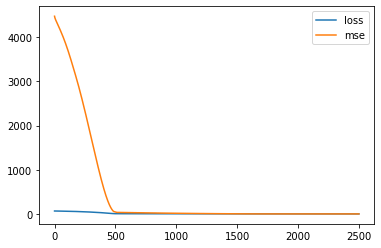

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
r=tf.keras.metrics.RootMeanSquaredError()
r(Y_test,preds)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5545644>